In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.neural_network import MLPClassifier

matplotlib.rc('font',family='NanumGothic')
matplotlib.rc('axes',unicode_minus=False)

import warnings
warnings.filterwarnings('ignore')

## KNN

In [3]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns#가설검정 및 통계분석 패키지

In [7]:
import os
os.environ["PATH"]

os.chdir(r"/home/piai/2023_권세영/수업 자료/bigdata/my_data/data_fine")
os.getcwd()
df_raw = pd.read_csv("./유방암.csv", encoding = 'euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [8]:
#목표변수 양성 1: 음성0
#설명변수, 목표변수 데이터 구분
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_x = df_raw.drop('diagnosis',axis = 1, inplace = False )

df_raw_y = df_raw['diagnosis']
df_raw_y  = pd.get_dummies(df_raw_y)
df_raw_y = df_raw_y['양성']
df_raw_y = df_raw_y.squeeze()

#데이터 분할 Train_test_split(X: t: 설명변수, Y:목표변수, test_size = test 데이터 비율)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,test_size=0.4,random_state = 1234)
print("분할 전 설명변수 데이터 : ", df_raw_x.shape)
print("분할 후 설명변수 데이터 : ", df_train_x.shape,df_test_x.shape)

분할 전 설명변수 데이터 :  (320, 30)
분할 후 설명변수 데이터 :  (192, 30) (128, 30)


### 기본 모델 생성

In [9]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))

print("Accuracy on test set : {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.932
Accuracy on test set : 0.914


In [11]:
print(knn_uncustomized.get_params().keys())
print(knn_uncustomized.get_params().values())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
dict_values(['auto', 30, 'minkowski', None, None, 5, 2, 'uniform'])


### 이웃 수 증가에 따른 정확도 변화

In [31]:
train_accuracy = []; test_accuracy=[]

para_n_neightbors = [i for i in range(3, 31)]

for v_n_neighbors in para_n_neightbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors) 
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
    
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neightbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy

In [32]:
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,3,0.932,0.898
1,4,0.911,0.891
2,5,0.932,0.914
3,6,0.927,0.914
4,7,0.927,0.898
5,8,0.922,0.914
6,9,0.911,0.906
7,10,0.911,0.906
8,11,0.917,0.906
9,12,0.917,0.906


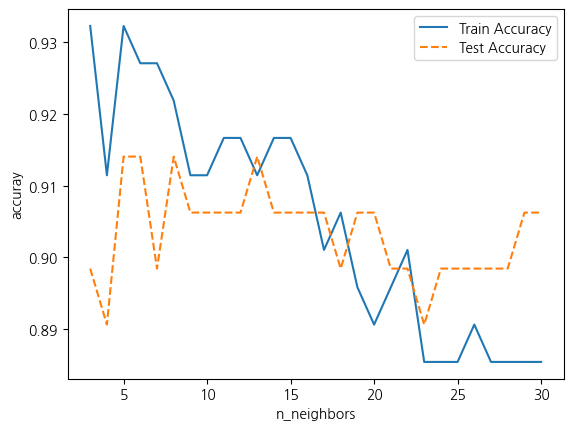

In [33]:
plt.plot(para_n_neightbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neightbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("n_neighbors"); plt.ylabel("accuray")
plt.legend()

5일때 가장 괜찮을 것 같으므로 임의로 5로 선택

In [34]:
n_neighbros = 5

### 가중치 별 이웃 수 증가에 따른 정확도 변화

In [53]:
train_accuracy = []; test_accuracy=[]

para_n_neightbors = [i for i in range(3, 31)]*2

para_weights = (["uniform"] * 28) + (["distance"]*28)

for (v_n_neighbors, v_weights) in zip (para_n_neightbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights) 
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
    
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neightbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy

In [54]:
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,3,uniform,0.932,0.898
1,4,uniform,0.911,0.891
2,5,uniform,0.932,0.914
3,6,uniform,0.927,0.914
4,7,uniform,0.927,0.898
5,8,uniform,0.922,0.914
6,9,uniform,0.911,0.906
7,10,uniform,0.911,0.906
8,11,uniform,0.917,0.906
9,12,uniform,0.917,0.906


In [55]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = "Neighbors", columns = "Weights", values = ["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
3                   1.0  0.932292     0.898438  0.898438
4                   1.0  0.911458     0.898438  0.890625
5                   1.0  0.932292     0.914062  0.914062
6                   1.0  0.927083     0.929688  0.914062
7                   1.0  0.927083     0.890625  0.898438
8                   1.0  0.921875     0.906250  0.914062
9                   1.0  0.911458     0.914062  0.906250
10                  1.0  0.911458     0.929688  0.906250
11                  1.0  0.916667     0.914062  0.906250
12                  1.0  0.916667     0.906250  0.906250
13                  1.0  0.911458     0.906250  0.914062
14                  1.0  0.916667     0.906250  0.906250
15                  1.0  0.916667     0.906250  0.906250
16                  1.0  0.911458     0.906250  0.906250
17                  1.0  0.901042     0.906250  0.906250
18                  1.0  0.906250     0.898438  0.898438
19                  1.0  0.895833     0.898438  0.906250
20                  1.0  0.890625     0.906250  0.906250
21                  1.0  0.895833     0.898438  0.898438
22                  1.0  0.901042     0.906250  0.898438
23                  1.0  0.885417     0.906250  0.890625
24                  1.0  0.885417     0.906250  0.898438
25                  1.0  0.885417     0.898438  0.898438
26                  1.0  0.890625     0.906250  0.898438
27                  1.0  0.885417     0.906250  0.898438
28                  1.0  0.885417     0.906250  0.898438
29                  1.0  0.885417     0.906250  0.906250
30                  1.0  0.885417     0.914062  0.906250

In [56]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + "_"  + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
3,1.0,0.932292,0.898438,0.898438
4,1.0,0.911458,0.898438,0.890625
5,1.0,0.932292,0.914062,0.914062
6,1.0,0.927083,0.929688,0.914062
7,1.0,0.927083,0.890625,0.898438


<AxesSubplot:xlabel='Neighbors'>

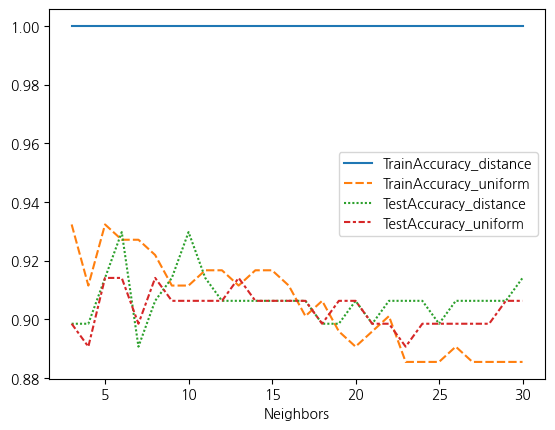

In [57]:
sns.lineplot(data = df_accuracy_weights_pivot)

weights = "uniform" 으로 선택

### 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [58]:
train_accuracy = []; test_accuracy=[]

para_n_neightbors = [i for i in range(3, 31)]*2

para_metric = (["euclidean"] * 28) + (["manhattan"]*28)

for (v_n_neighbors, v_metric) in zip (para_n_neightbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = "uniform") 
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
    
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neightbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,3,euclidean,0.932,0.898
1,4,euclidean,0.911,0.891
2,5,euclidean,0.932,0.914
3,6,euclidean,0.927,0.914
4,7,euclidean,0.927,0.898
5,8,euclidean,0.922,0.914
6,9,euclidean,0.911,0.906
7,10,euclidean,0.911,0.906
8,11,euclidean,0.917,0.906
9,12,euclidean,0.917,0.906


In [59]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors", columns = "Metric", values = ["TrainAccuracy", "TestAccuracy"])
df_accuracy_metric_pivot


TrainAccuracy           TestAccuracy          
Metric        euclidean manhattan    euclidean manhattan
Neighbors                                               
3              0.932292  0.932292     0.898438  0.898438
4              0.911458  0.921875     0.890625  0.914062
5              0.932292  0.942708     0.914062  0.937500
6              0.927083  0.927083     0.914062  0.921875
7              0.927083  0.916667     0.898438  0.921875
8              0.921875  0.927083     0.914062  0.914062
9              0.911458  0.916667     0.906250  0.914062
10             0.911458  0.911458     0.906250  0.929688
11             0.916667  0.916667     0.906250  0.914062
12             0.916667  0.916667     0.906250  0.914062
13             0.911458  0.911458     0.914062  0.914062
14             0.916667  0.916667     0.906250  0.898438
15             0.916667  0.906250     0.906250  0.898438
16             0.911458  0.911458     0.906250  0.906250
17             0.901042  0.901042     0.906250  0.898438
18             0.906250  0.895833     0.898438  0.914062
19             0.895833  0.895833     0.906250  0.898438
20             0.890625  0.901042     0.906250  0.898438
21             0.895833  0.895833     0.898438  0.898438
22             0.901042  0.901042     0.898438  0.906250
23             0.885417  0.895833     0.890625  0.906250
24             0.885417  0.901042     0.898438  0.906250
25             0.885417  0.895833     0.898438  0.898438
26             0.890625  0.895833     0.898438  0.898438
27             0.885417  0.895833     0.898438  0.906250
28             0.885417  0.895833     0.898438  0.906250
29             0.885417  0.885417     0.906250  0.906250
30             0.885417  0.890625     0.906250  0.906250

<AxesSubplot:xlabel='Neighbors'>

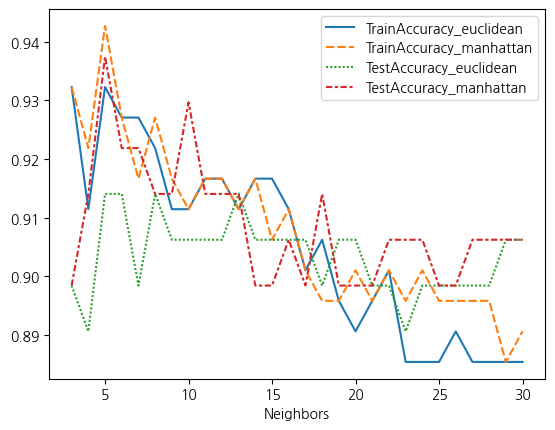

In [60]:
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_"  + level1
df_accuracy_metric_pivot.head()
sns.lineplot(data = df_accuracy_metric_pivot)

### 3 -30 까지의 이웃 수 변화에 따른 정확도는 위와 같다. 


### 최종 모델

In [62]:
knn_model = KNeighborsClassifier(n_neighbors = 4, weights = "uniform", metric = "euclidean")
knn_model.fit(df_train_x, df_train_y)
y_pred = knn_model.predict(df_test_x)

print('Accuracy on training set:{:.3f}\n'.format(knn_model.score(df_train_x,df_train_y)))
print('Accuracy on test set:{:.3f}\n'.format(knn_model.score(df_test_x,df_test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))
# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y,y_pred,digits=3))

Accuracy on training set:0.911

Accuracy on test set:0.891

Confusion matrix:
[[92  5]
 [ 9 22]]
              precision    recall  f1-score   support

           0      0.911     0.948     0.929        97
           1      0.815     0.710     0.759        31

    accuracy                          0.891       128
   macro avg      0.863     0.829     0.844       128
weighted avg      0.888     0.891     0.888       128



### 결론
테스트의 정확도는 0.891

Confusion matrix 는 위와 같다.

이웃주가 증가할 수록 